In [2]:
import torch
torch.__version__

'2.0.0'

# Tensor

## Scalar

In [3]:
# Scalar
scalar = torch.tensor(7)
scalar

tensor(7)

See how the above printed out `tensor(7)`? That means although scalar is a single number, it's of type `torch.Tensor`.

In [4]:
scalar.ndim

0

In [5]:
# Get the Python number within a tensor (only works with one-element tensors)
scalar.item()

7

## Vector

In [6]:
# Vector
vector = torch.tensor([7, 7])
vector

tensor([7, 7])

In [7]:
# Check the number of dimensions of vector
vector.ndim

1

Hmm, that's strange, vector contains two numbers but only has a single dimension.

I'll let you in on a trick.

You can tell the number of dimensions a tensor in PyTorch has by the number of square brackets on the outside and you only need to count one side.

In [8]:
# Check shape of vector
vector.shape

torch.Size([2])

The above returns `torch.Size([2])` which means our vector has a shape of `[2]`. This is because of the two elements we placed inside the square brackets (`[7, 7]`).

## Matrix

In [9]:
# Matrix
MATRIX = torch.tensor([[7, 8], 
                       [9, 10]])
MATRIX

tensor([[ 7,  8],
        [ 9, 10]])

In [10]:
# Check number of dimensions
MATRIX.ndim

2

In [11]:
MATRIX.shape

torch.Size([2, 2])

We get the output `torch.Size([2, 2])` because `MATRIX` is two elements deep and two elements wide.

In [15]:
MATRIX[0]

tensor([7, 8])

## Tensor

In [12]:
# Tensor
TENSOR = torch.tensor([[[1, 2, 3],
                        [3, 6, 9],
                        [2, 4, 5]]])
TENSOR

tensor([[[1, 2, 3],
         [3, 6, 9],
         [2, 4, 5]]])

In [13]:
# Check number of dimensions for TENSOR
TENSOR.ndim

3

In [14]:
# Check shape of TENSOR
TENSOR.shape

torch.Size([1, 3, 3])

The dimensions go outer to inner.

That means there's 1 dimension of 3 by 3.

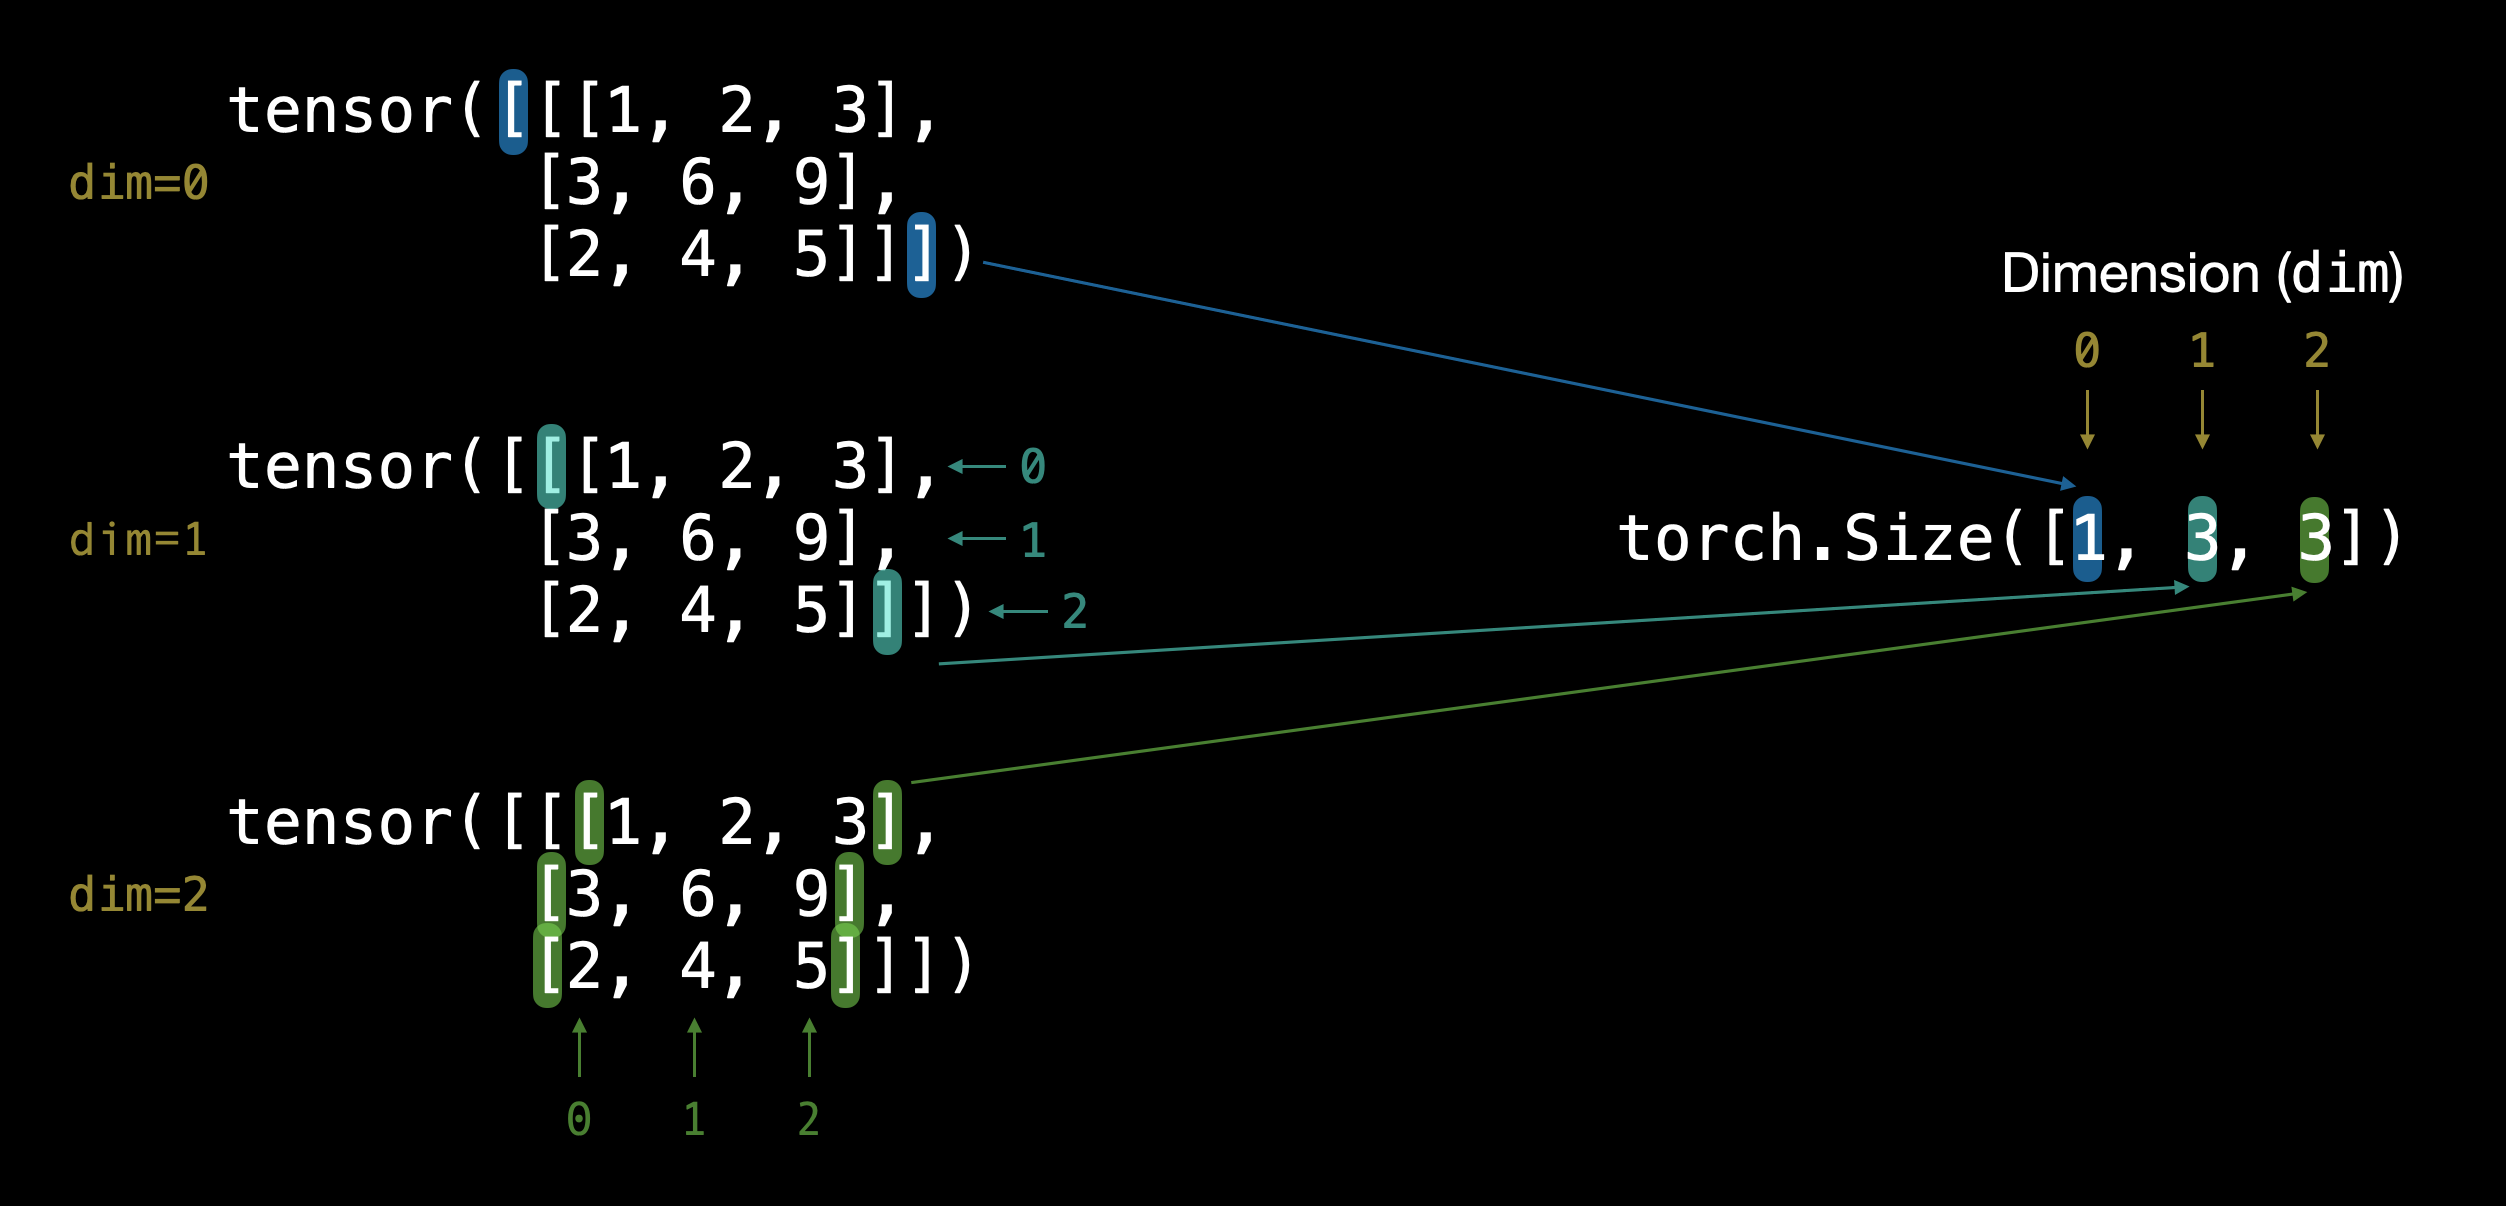

In [19]:
TENSOR[0]

tensor([[1, 2, 3],
        [3, 6, 9],
        [2, 4, 5]])

In [20]:
TENSOR[0][0]

tensor([1, 2, 3])

In [21]:
TENSOR[0][0][0]

tensor(1)

In [30]:
print(f"Shape of tensor: {TENSOR.shape}")
print(f"Datatype of tensor: {TENSOR.dtype}")
print(f"Device tensor is stored on: {TENSOR.device}") # will default to CPU

Shape of tensor: torch.Size([1, 3, 3])
Datatype of tensor: torch.int64
Device tensor is stored on: cpu


When you run into issues in PyTorch, it's very often one to do with one of the three attributes above. So when the error messages show up, sing yourself a little song called "what, what, where": 

"what shape are my tensors? what datatype are they and where are they stored? what shape, what datatype, where where where"

# Tensor Utils

## Random

In [22]:
# Create a random tensor of size (3, 4)
random_tensor = torch.rand(size=(3, 4))
random_tensor, random_tensor.dtype

(tensor([[0.6273, 0.0998, 0.2945, 0.9756],
         [0.0388, 0.4795, 0.4980, 0.1317],
         [0.9907, 0.3522, 0.5287, 0.8586]]),
 torch.float32)

For example, say you wanted a random tensor in the common image shape of `[224, 224, 3]` (`[height, width, color_channels]`).

In [23]:
# Create a random tensor of size (224, 224, 3)
random_image_size_tensor = torch.rand(size=(224, 224, 3))
random_image_size_tensor.shape, random_image_size_tensor.ndim

(torch.Size([224, 224, 3]), 3)

## Zeros and ones

In [25]:
# Create a tensor of all zeros
zeros = torch.zeros(size=(3, 4))
zeros, zeros.dtype

(tensor([[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]),
 torch.float32)

In [26]:
# Create a tensor of all ones
ones = torch.ones(size=(3, 4))
ones, ones.dtype

(tensor([[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]),
 torch.float32)

## Creating a range and tensors like

In [27]:
# Create a range of values 0 to 10
zero_to_ten = torch.arange(start=0, end=10, step=1)
zero_to_ten

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Sometimes you might want one tensor of a certain type with the same shape as another tensor.

In [28]:
# Can also create a tensor of zeros similar to another tensor
ten_zeros = torch.zeros_like(input=zero_to_ten) # will have same shape
ten_zeros

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## Datatype

In [29]:
# Default datatype for tensors is float32
float_32_tensor = torch.tensor([3.0, 6.0, 9.0],
                               dtype=None, # defaults to None, which is torch.float32 or whatever datatype is passed
                               device=None, # defaults to None, which uses the default tensor type
                               requires_grad=False) # if True, operations performed on the tensor are recorded 

float_32_tensor.shape, float_32_tensor.dtype, float_32_tensor.device

(torch.Size([3]), torch.float32, device(type='cpu'))

# Tensor Operations

In [31]:
# Create a tensor of values and add a number to it
tensor = torch.tensor([1, 2, 3])
tensor + 10

tensor([11, 12, 13])

In [36]:
# Scalar multiplication by 10
tensor * 10

tensor([10, 20, 30])

In [34]:
# Element-wise multiplication
tensor * tensor

tensor([1, 4, 9])

The main two rules for matrix multiplication to remember are:

1. The inner dimensions must match
    - `(3, 2) @ (3, 2)` won't work
    - `(2, 3) @ (3, 2)` will work
1. The resulting matrix has the shape of the outer dimensions
    - `(2, 3) @ (3, 2) -> (2, 2)`

Note: "@" in Python is the symbol for matrix multiplication.

In [35]:
# Matrix multiplication
torch.matmul(tensor, tensor)

tensor(14)

In [38]:
# Can also use the "@" symbol for matrix multiplication, though not recommended
tensor @ tensor # The in-built torch.matmul() method is faster.

tensor(14)

A matrix multiplication like this is also referred to as the dot product of two matrices.

# Tensor Shape Errors

## Basic

In [40]:
# Shapes need to be in the right way  
tensor_A = torch.tensor([[1, 2],
                         [3, 4],
                         [5, 6]], dtype=torch.float32)

tensor_B = torch.tensor([[7, 10],
                         [8, 11], 
                         [9, 12]], dtype=torch.float32)

#torch.matmul(tensor_A, tensor_B) # (this will error)

In [41]:
# View tensor_A and tensor_B
print(tensor_A)
print(tensor_B)

tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])
tensor([[ 7., 10.],
        [ 8., 11.],
        [ 9., 12.]])


In [42]:
# View tensor_A and tensor_B.T
print(tensor_A)
print(tensor_B.T)

tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])
tensor([[ 7.,  8.,  9.],
        [10., 11., 12.]])


In [43]:
# The operation works when tensor_B is transposed
print(f"Original shapes: tensor_A = {tensor_A.shape}, tensor_B = {tensor_B.shape}\n")
print(f"New shapes: tensor_A = {tensor_A.shape} (same as above), tensor_B.T = {tensor_B.T.shape}\n")

print(f"Multiplying: {tensor_A.shape} * {tensor_B.T.shape} <- inner dimensions match\n")

print("Output:\n")
output = torch.matmul(tensor_A, tensor_B.T)
print(output) 
print(f"\nOutput shape: {output.shape}")

Original shapes: tensor_A = torch.Size([3, 2]), tensor_B = torch.Size([3, 2])

New shapes: tensor_A = torch.Size([3, 2]) (same as above), tensor_B.T = torch.Size([2, 3])

Multiplying: torch.Size([3, 2]) * torch.Size([2, 3]) <- inner dimensions match

Output:

tensor([[ 27.,  30.,  33.],
        [ 61.,  68.,  75.],
        [ 95., 106., 117.]])

Output shape: torch.Size([3, 3])


In [44]:
# torch.mm is a shortcut for matmul
torch.mm(tensor_A, tensor_B.T)

tensor([[ 27.,  30.,  33.],
        [ 61.,  68.,  75.],
        [ 95., 106., 117.]])

## Aggregation

In [48]:
# Create a tensor
x = torch.arange(0, 100, 10)
x

tensor([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

In [49]:
print(f"Minimum: {x.min()}")
print(f"Maximum: {x.max()}")
# print(f"Mean: {x.mean()}") # this will error
print(f"Mean: {x.type(torch.float32).mean()}") # won't work without float datatype
print(f"Sum: {x.sum()}")

Minimum: 0
Maximum: 90
Mean: 45.0
Sum: 450


You may find some methods such as torch.mean() require tensors to be in torch.float32 (the most common) or another specific datatype, otherwise the operation will fail.

## Position of min/max

In [50]:
# Create a tensor
tensor = torch.arange(10, 100, 10)
print(f"Tensor: {tensor}")

# Returns index of max and min values
print(f"Index where max value occurs: {tensor.argmax()}")
print(f"Index where min value occurs: {tensor.argmin()}")

Tensor: tensor([10, 20, 30, 40, 50, 60, 70, 80, 90])
Index where max value occurs: 8
Index where min value occurs: 0


## Change tensor datatype

In [51]:
# Create a tensor and check its datatype
tensor = torch.arange(10., 100., 10.)
tensor.dtype

torch.float32

In [52]:
# Create a float16 tensor
tensor_float16 = tensor.type(torch.float16)
tensor_float16

tensor([10., 20., 30., 40., 50., 60., 70., 80., 90.], dtype=torch.float16)

## Reshaping & stacking 

In [53]:
# Create a tensor
import torch
x = torch.arange(1., 8.)
x, x.shape

(tensor([1., 2., 3., 4., 5., 6., 7.]), torch.Size([7]))

In [54]:
# Add an extra dimension
x_reshaped = x.reshape(1, 7)
x_reshaped, x_reshaped.shape

(tensor([[1., 2., 3., 4., 5., 6., 7.]]), torch.Size([1, 7]))

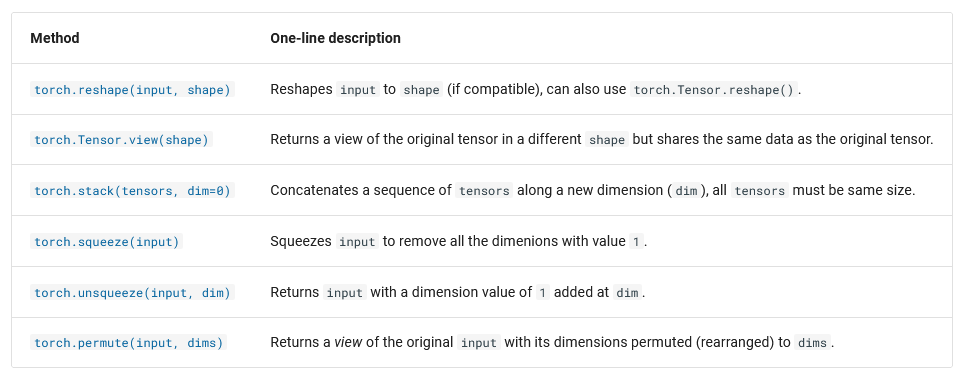

In [55]:
# Change view (keeps same data as original but changes view)
# See more: https://stackoverflow.com/a/54507446/7900723
z = x.view(1, 7)
z, z.shape

(tensor([[1., 2., 3., 4., 5., 6., 7.]]), torch.Size([1, 7]))

In [56]:
# Changing z changes x
z[:, 0] = 5
z, x

(tensor([[5., 2., 3., 4., 5., 6., 7.]]), tensor([5., 2., 3., 4., 5., 6., 7.]))

## Squeezing & unsqueezing

In [57]:
# Stack tensors on top of each other
x_stacked = torch.stack([x, x, x, x], dim=0) # try changing dim to dim=1 and see what happens
x_stacked

tensor([[5., 2., 3., 4., 5., 6., 7.],
        [5., 2., 3., 4., 5., 6., 7.],
        [5., 2., 3., 4., 5., 6., 7.],
        [5., 2., 3., 4., 5., 6., 7.]])

In [58]:
x_stacked = torch.stack([x, x, x, x], dim=1) # try changing dim to dim=1 and see what happens
x_stacked

tensor([[5., 5., 5., 5.],
        [2., 2., 2., 2.],
        [3., 3., 3., 3.],
        [4., 4., 4., 4.],
        [5., 5., 5., 5.],
        [6., 6., 6., 6.],
        [7., 7., 7., 7.]])

In [60]:
print(f"Previous tensor: {x_reshaped}")
print(f"Previous shape: {x_reshaped.shape}")

# Remove extra dimension from x_reshaped
x_squeezed = x_reshaped.squeeze()

print(f"\nNew tensor: {x_squeezed}")
print(f"New shape: {x_squeezed.shape}")

Previous tensor: tensor([[5., 2., 3., 4., 5., 6., 7.]])
Previous shape: torch.Size([1, 7])

New tensor: tensor([5., 2., 3., 4., 5., 6., 7.])
New shape: torch.Size([7])


In [61]:
print(f"Previous tensor: {x_squeezed}")
print(f"Previous shape: {x_squeezed.shape}")

## Add an extra dimension with unsqueeze
x_unsqueezed = x_squeezed.unsqueeze(dim=0)
print(f"\nNew tensor: {x_unsqueezed}")
print(f"New shape: {x_unsqueezed.shape}")

Previous tensor: tensor([5., 2., 3., 4., 5., 6., 7.])
Previous shape: torch.Size([7])

New tensor: tensor([[5., 2., 3., 4., 5., 6., 7.]])
New shape: torch.Size([1, 7])


## Permute dims

In [62]:
# Create tensor with specific shape
x_original = torch.rand(size=(224, 224, 3))

# Permute the original tensor to rearrange the axis order
x_permuted = x_original.permute(2, 0, 1) # shifts axis 0->1, 1->2, 2->0

print(f"Previous shape: {x_original.shape}")
print(f"New shape: {x_permuted.shape}")

Previous shape: torch.Size([224, 224, 3])
New shape: torch.Size([3, 224, 224])


# Indexing 

In [63]:
# Create a tensor 
import torch
x = torch.arange(1, 10).reshape(1, 3, 3)
x, x.shape

(tensor([[[1, 2, 3],
          [4, 5, 6],
          [7, 8, 9]]]),
 torch.Size([1, 3, 3]))

Indexing values goes outer dimension -> inner dimension (check out the square brackets).

In [64]:
# Let's index bracket by bracket
print(f"First square bracket:\n{x[0]}") 
print(f"Second square bracket: {x[0][0]}") 
print(f"Third square bracket: {x[0][0][0]}")

First square bracket:
tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
Second square bracket: tensor([1, 2, 3])
Third square bracket: 1


You can also use : to specify "all values in this dimension" and then use a comma (`,`) to add another dimension.

In [65]:
# Get all values of 0th dimension and the 0 index of 1st dimension
x[:, 0]

tensor([[1, 2, 3]])

In [66]:
# Get all values of 0th & 1st dimensions but only index 1 of 2nd dimension
x[:, :, 1]

tensor([[2, 5, 8]])

In [67]:
# Get all values of the 0 dimension but only the 1 index value of the 1st and 2nd dimension
x[:, 1, 1]

tensor([5])

In [68]:
# Get index 0 of 0th and 1st dimension and all values of 2nd dimension 
x[0, 0, :] # same as x[0][0]

tensor([1, 2, 3])

# PyTorch tensors & NumPy

In [69]:
# NumPy array to tensor
import torch
import numpy as np
array = np.arange(1.0, 8.0)
tensor = torch.from_numpy(array)
array, tensor

(array([1., 2., 3., 4., 5., 6., 7.]),
 tensor([1., 2., 3., 4., 5., 6., 7.], dtype=torch.float64))

Note: By default, NumPy arrays are created with the datatype `float64` and if you convert it to a PyTorch tensor, it'll keep the same datatype (as above).

However, many PyTorch calculations default to using `float32`.

So if you want to convert your NumPy array (`float64`) -> PyTorch tensor (`float64`) -> PyTorch tensor (`float32`), you can use `tensor = torch.from_numpy(array).type(torch.float32)`

In [70]:
torch.from_numpy(array).type(torch.float32)

tensor([1., 2., 3., 4., 5., 6., 7.])

If you change the tensor, the array stays the same.

In [71]:
# Change the array, keep the tensor
array = array + 1
array, tensor

(array([2., 3., 4., 5., 6., 7., 8.]),
 tensor([1., 2., 3., 4., 5., 6., 7.], dtype=torch.float64))

In [73]:
# Tensor to NumPy array
tensor = torch.ones(7) # create a tensor of ones with dtype=float32
numpy_tensor = tensor.numpy() # will be dtype=float32 unless changed
tensor, numpy_tensor

(tensor([1., 1., 1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1., 1., 1.], dtype=float32))

In [74]:
# Change the tensor, keep the array the same
tensor = tensor + 1
tensor, numpy_tensor

(tensor([2., 2., 2., 2., 2., 2., 2.]),
 array([1., 1., 1., 1., 1., 1., 1.], dtype=float32))

# Reproducibility

In [75]:
import torch
import random

# # Set the random seed
RANDOM_SEED=42 # try changing this to different values and see what happens to the numbers below
torch.manual_seed(seed=RANDOM_SEED) 
random_tensor_C = torch.rand(3, 4)

# Have to reset the seed every time a new rand() is called 
# Without this, tensor_D would be different to tensor_C 
torch.random.manual_seed(seed=RANDOM_SEED) # try commenting this line out and seeing what happens
random_tensor_D = torch.rand(3, 4)

print(f"Tensor C:\n{random_tensor_C}\n")
print(f"Tensor D:\n{random_tensor_D}\n")
print(f"Does Tensor C equal Tensor D? (anywhere)")
random_tensor_C == random_tensor_D

Tensor C:
tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])

Tensor D:
tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])

Does Tensor C equal Tensor D? (anywhere)


tensor([[True, True, True, True],
        [True, True, True, True],
        [True, True, True, True]])

# Running Tensors on GPU

In [76]:
!nvidia-smi

Tue Apr 18 22:57:55 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 512.36       Driver Version: 512.36       CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0  On |                  N/A |
| N/A   36C    P8    11W /  N/A |    294MiB /  6144MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Basic

In [77]:
# Check for GPU
torch.cuda.is_available()

True

In [78]:
# Set device type
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [79]:
# Count number of devices
torch.cuda.device_count()

1

## Putting tensors (and models) on the GPU

In [80]:
# Create tensor (default on CPU)
tensor = torch.tensor([1, 2, 3])

# Tensor not on GPU
print(tensor, tensor.device)

# Move tensor to GPU (if available)
tensor_on_gpu = tensor.to(device)
tensor_on_gpu

tensor([1, 2, 3]) cpu


tensor([1, 2, 3], device='cuda:0')

Notice the second tensor has device='cuda:0', this means it's stored on the 0th GPU available (GPUs are 0 indexed, if two GPUs were available, they'd be 'cuda:0' and 'cuda:1' respectively, up to 'cuda:n').

In [88]:
# what happens if you modify one
tensor += 10 

In [89]:
tensor

tensor([21, 22, 23])

In [90]:
tensor_on_gpu

tensor([1, 2, 3], device='cuda:0')

## Moving tensors back to the CPU

What if we wanted to move the tensor back to CPU? For example, you'll want to do this if you want to interact with your tensors with NumPy (NumPy does not leverage the GPU).

In [83]:
# If tensor is on GPU, can't transform it to NumPy (this will error)
#tensor_on_gpu.numpy()

In [84]:
# Instead, copy the tensor back to cpu
tensor_back_on_cpu = tensor_on_gpu.cpu().numpy()
tensor_back_on_cpu

array([1, 2, 3], dtype=int64)

The above returns a copy of the GPU tensor in CPU memory so the original tensor is still on GPU.

In [91]:
tensor_on_gpu

tensor([1, 2, 3], device='cuda:0')